# Visualizing the sky background noise

Sky background (Earthshine + zodiacal light) data from
[pysynphot](https://github.com/spacetelescope/pysynphot/tree/925cdbac35a7851cee1bddaa2b47651235c44851/pysynphot/data/generic)


In [1]:
# I only need the following line since I'm using remote VS Code
%cd "/arc/home/IsaacCheng/CASTOR/ETC/notebooks"

import matplotlib.pyplot as plt
from astropy.io import fits
from IPython.core.display import display

# Import my own modules
import sys
sys.path.append("../")
from castor_etc import filepaths as fp


/arc/home/IsaacCheng/CASTOR/ETC/notebooks


In [2]:
earthshine, earthshine_header = fits.getdata(
    fp.DATAPATH + "background/earthshine.fits", header=True
)
print(earthshine.field(0))
print(earthshine.field(1))
zodi, zodi_header = fits.getdata(fp.DATAPATH + "background/zodi.fits", header=True)
print(zodi.field(0))
print(zodi.field(1))


[ 1000.  1001.  1002. ... 24960. 24980. 25000.]
[2.413579e-23 2.868297e-23 3.322108e-23 ... 6.974366e-20 6.947341e-20
 6.969851e-20]
[ 1000.  1001.  1002. ... 24960. 24980. 25000.]
[4.74299600e-29 4.86987600e-29 4.99646100e-29 ... 9.88339305e-20
 9.87173890e-20 9.88148235e-20]


In [3]:
display(earthshine_header)
print()
display(zodi_header)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 4171                                                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2                                                  
TTYPE1  = 'Wavelength'         / label for field   1                            
TFORM1  = '1E      '           / data format of field: 4-byte REAL              
TUNIT1  = 'Angstroms'          / physical unit of field                         
TTYPE2  = 'FLUX    '           / label for field   2                            
TFORM2  = '1D      '        

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                 4171                                                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2                                                  
TTYPE1  = 'WAVELENGTH'         / label for field   1                            
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'Angstroms'          / physical unit of field                         
TTYPE2  = 'FLUX    '           / label for field   2                            
TFORM2  = '1D      '        

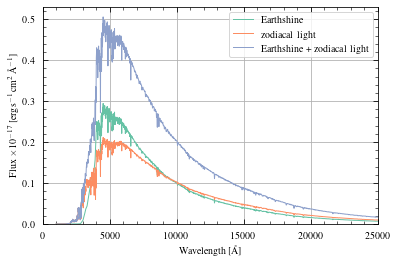

In [4]:
fig, ax = plt.subplots()
ax.plot(earthshine.field(0), earthshine.field(1) * 1e17, lw=1, label="Earthshine")
ax.plot(zodi.field(0), zodi.field(1) * 1e17, lw=1, label="zodiacal light")
ax.plot(
    earthshine.field(0),
    (earthshine.field(1) + zodi.field(1)) * 1e17,
    lw=1,
    label="Earthshine + zodiacal light",
)
ax.set_xlabel(r"Wavelength [\AA]")
ax.set_ylabel(r"Flux $\times 10^{-17}$ [$\rm erg\,s^{-1}\,cm^2\,$\AA$^{-1}$]")
ax.legend()
# ax.set_xlim(2000, 17000)
ax.set_xlim(0, 25000)
ax.set_ylim(bottom=0)
fig.savefig(fp.OUTPATH + "sky_background.pdf")
plt.show()
